In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
# Data

from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv
Saving test.csv to test (1).csv


In [100]:
import io
train_data = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test_data = pd.read_csv(io.BytesIO(uploaded['test.csv']))

In [101]:
train_data.drop(columns=['Unnamed: 0'], inplace=True)
train_data

,Open
0,19.000000
1,25.790001
2,25.000000
3,23.000000
4,20.000000
...,...
1995,285.859985
1996,294.339996
1997,297.700012
1998,300.500000


In [102]:
test_data.drop(columns=['Unnamed: 0'], inplace=True)
test_data

,Open
0,319.000000
1,322.510010
2,344.700012
3,346.709991
4,347.630005
...,...
411,568.489990
412,575.690002
413,632.419983
414,640.000000


In [103]:
training_set = train_data.values
training_set

array([[ 19.      ],
       [ 25.790001],
       [ 25.      ],
       ...,
       [297.700012],
       [300.5     ],
       [316.149994]])

In [104]:
# Normalizing:

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))

training_data_scaled = sc.fit_transform(training_set)

In [105]:
training_data_scaled.shape

(2000, 1)

In [107]:
X_train = []
y_train = []

for i in range(60, 2000):
  X_train.append(training_data_scaled[i-60:i, 0])
  y_train.append(training_data_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [108]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [109]:
# Building the Model:


model = tf.keras.models.Sequential()

model.add(tf.keras.layers.LSTM(units=50, return_sequences=True, 
                               input_shape=(X_train.shape[1], 1)))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=1))

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_36 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
dropout_36 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_37 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_37 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_38 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_38 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_39 (LSTM)               (None, 50)              

In [110]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='mean_squared_error')

In [111]:
# Ealy Stopping:

cb = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

In [112]:
model_history = model.fit(X_train, y_train, epochs=50, callbacks=[cb], batch_size=32)

Epoch 1/50
61/61 [==============================] - 3s 55ms/step - loss: 0.2356
Epoch 2/50
61/61 [==============================] - 3s 55ms/step - loss: 0.2049
Epoch 3/50
61/61 [==============================] - 3s 55ms/step - loss: 0.1706
Epoch 4/50
61/61 [==============================] - 3s 56ms/step - loss: 0.1260
Epoch 5/50
61/61 [==============================] - 3s 55ms/step - loss: 0.0725
Epoch 6/50
61/61 [==============================] - 3s 54ms/step - loss: 0.0279
Epoch 7/50
61/61 [==============================] - 3s 55ms/step - loss: 0.0113
Epoch 8/50
61/61 [==============================] - 3s 55ms/step - loss: 0.0098
Epoch 9/50
61/61 [==============================] - 3s 55ms/step - loss: 0.0090
Epoch 10/50
61/61 [==============================] - 3s 55ms/step - loss: 0.0086
Epoch 11/50
61/61 [==============================] - 3s 55ms/step - loss: 0.0084
Epoch 12/50
61/61 [==============================] - 3s 55ms/step - loss: 0.0081
Epoch 13/50
61/61 [==================

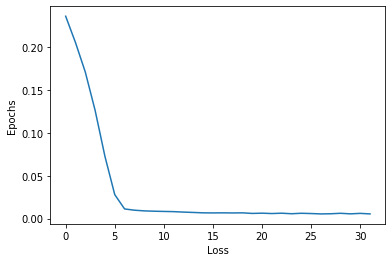

In [113]:
plt.plot(model_history.history['loss'])
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.show()

In [114]:
real_stock_price = test_data.values

In [115]:
dataset_total = pd.concat([train_data['Open'], test_data['Open']], axis=0)
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 416):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [116]:
# Predictions:

predicted_stock_price = model.predict(X_test)

In [117]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

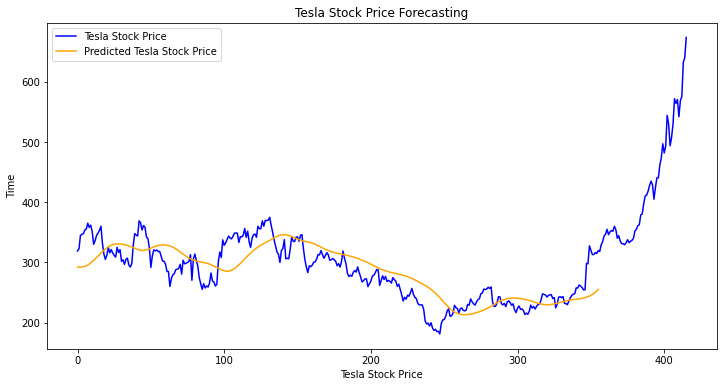

In [118]:
plt.figure(figsize=(12, 6))

plt.plot(real_stock_price, color='blue', label='Tesla Stock Price')
plt.plot(predicted_stock_price, color='orange', label='Predicted Tesla Stock Price')

plt.title('Tesla Stock Price Forecasting')
plt.ylabel('Time')
plt.xlabel('Tesla Stock Price')
plt.legend()
plt.show()